In [2]:
from pathlib import Path
import matplotlib as mpl
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

import homeomorphism_helpers as hh
from homeomorphism_helpers import fs

from papercolors import colordict as pcd

mpl.rcParams['figure.dpi']=300

paper_path = Path('../figures/')

In [40]:
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{{amsmath}}'
mpl.rc('font', family='serif', serif="Times New Roman")
mpl.rcParams['figure.dpi']=300
mpl.rc("pgf", texsystem = "pdflatex", preamble = "\n".join(
    [r"\usepackage{inputenc}", 
     r"\usepackage[T1]{fontenc}",
     r"\usepackage{cmbright}",
     r'\usepackage{{amsmath}}',
     r'\usepackage{unicode-math}',
    ]))

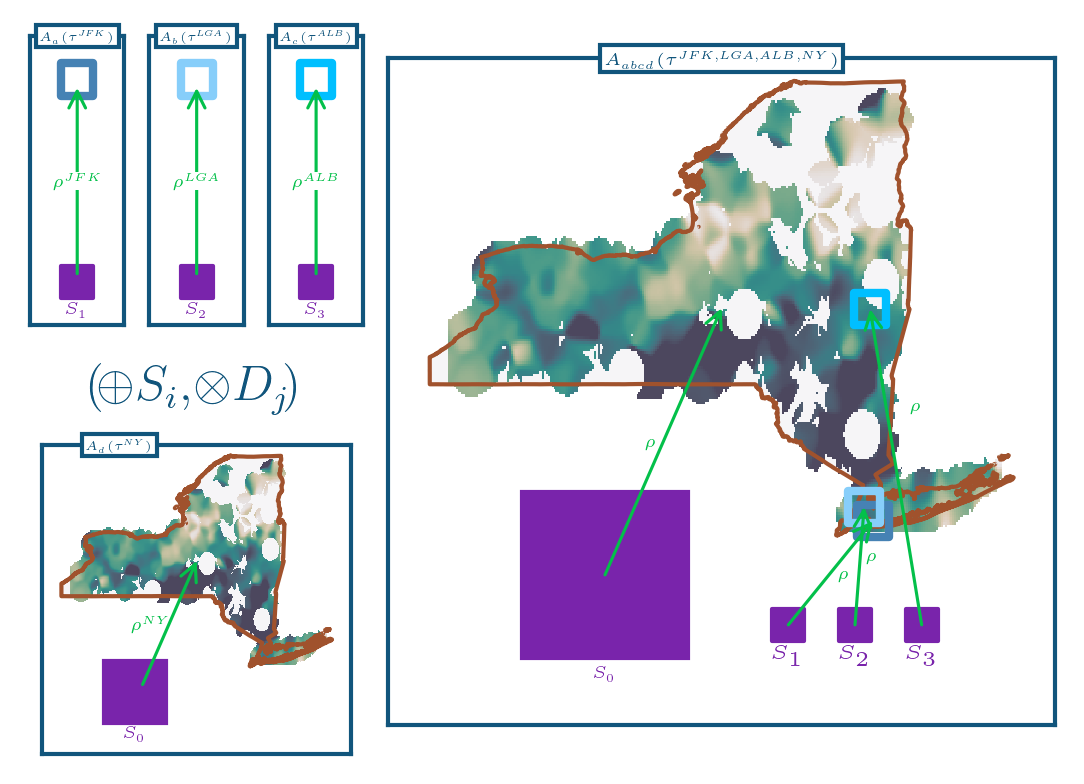

In [66]:
sq = [['sj', 'sl', 'sa']]
fig, axd = plt.subplot_mosaic([[sq, 'map'], ['mini', 'map']], figsize=(3.5, 2.5), layout='compressed', width_ratios=[1,2])

for axn in axd:
    axd[axn].set(xlim=(-0,1), ylim=(-0,1), xticks=[], yticks=[])
    axd[axn].spines[:].set_color(pcd['artist'])
    axd[axn].spines[:].set_linewidth(1)
    
mini_inset = axd['mini'].inset_axes([0, .25, 1, .75])

nygeo, nyshp =  hh.get_mapdata("nydata.csv", 's_22mr22.zip', hh.airports['map_date'])
mini_mp, mini_im = hh.make_map(nygeo, nyshp, mini_inset, colorbar=False, square=False, label=False)

map_inset = axd['map'].inset_axes([0, .25, 1, .75])

map_mp, map_im = hh.make_map(nygeo, nyshp, map_inset, colorbar=False, square=True, label=False)

arrowprops=dict(arrowstyle="->", color=pcd['section'], lw=.75)
sx = [.6, .7, .8]
sy = .85
sdy = .15



for i, (axn, (p_n, p_id, p_color)) in enumerate([('sj', (r'$\rho^{JFK}$','JFK INTL AP', hh.airports['jfk_color'])), 
                                  ('sl', (r'$\rho^{LGA}$','LAGUARDIA AP', hh.airports['lga_color'])), 
                                  ('sa', (r'$\rho^{ALB}$', 'ALBANY INTL AP', hh.airports['time_color']))]):
    
    p = nygeo[nygeo['NAME']==p_id]
    axd[axn].scatter(.5, sy, marker ='s', edgecolor=p_color, facecolor='none', s=60, linewidth=2)
    axd[axn].scatter(.5, sdy, marker='s', color=pcd['base'], s=60)
    axd[axn].text(.5, sdy-.07, f"$S_{i+1}$", ha='center', va='top', color=pcd['base'], fontsize=fs['tiny']-1)
    rho = axd[axn].annotate("", xy=(.5, sy), xytext=(.5, sdy), arrowprops=arrowprops)
    axd[axn].annotate(p_n, xy=(.5, .5), xycoords=rho, color=pcd['section'], fontsize=fs['tiny']-1, bbox=dict(facecolor='white', edgecolor='none', pad=.1), ha='center')
    
    rhos = mpatches.ConnectionPatch(xyA=(sx[i], .15), xyB=(p['LONGITUDE'].values[0], p['LATITUDE'].values[0]), 
                                   coordsA = axd['map'].transData, coordsB=map_inset.transData, 
                                   axesA=axd['map'], axesB=map_inset, **arrowprops)
    fig.add_artist(rhos)
    axd['map'].annotate(r"$\rho$", xy=(sx[i], sx[i]-.1), xycoords=rhos, 
                        va='center', ha='left', fontsize=fs['tiny']-1, color=pcd['section'])

axd['map'].scatter(sx, [.15, .15, .15], marker='s', color=pcd['base'], s=60)
rect = mpatches.Rectangle((.2, .1), width=.25, height=.25, color=pcd['base'])
axd['map'].add_artist(rect)
axd['map'].set_aspect('equal')
axd['map'].annotate(r"$S_{0}$", xy=(.5,-.05), xycoords=rect, color=pcd['base'], fontsize=fs['tiny']-1, ha='center', va='top')


rhos = mpatches.ConnectionPatch(xyA=(.2+.25/2, .1 + .25/2), xyB=(.5, .5), 
                                   coordsA = axd['map'].transData, coordsB=map_inset.transAxes, 
                                   axesA=axd['map'], axesB=map_inset, **arrowprops)
fig.add_artist(rhos)
axd['map'].annotate(r"$\rho$", xy=(.45, .5), xycoords=rhos, 
                        va='center', ha='right', fontsize=fs['tiny']-1, color=pcd['section'])

for i, sx in enumerate(sx):
    axd['map'].text(sx, .12, f"$S_{i+1}$", ha='center', va='top', color=pcd['base'], fontsize=fs['tiny'])

axd['mini'].set_aspect('equal')

rect = mpatches.Rectangle((.2, .1), width=.2, height=.2, color=pcd['base'])
axd['mini'].add_artist(rect)
axd['mini'].annotate(r"$S_{0}$", xy=(.5,-.05), xycoords=rect, color=pcd['base'], fontsize=fs['tiny']-1, 
                   ha='center', va='top')

rhos = mpatches.ConnectionPatch(xyA=(.2+.25/2, .1 + .25/2), xyB=(.5, .5), 
                                   coordsA = axd['mini'].transData, coordsB=mini_inset.transAxes, 
                                   axesA=axd['mini'], axesB=mini_inset, **arrowprops)
fig.add_artist(rhos)
axd['mini'].annotate(r"$\rho^{NY}$", xy=(.45, .5), xycoords=rhos, 
                        va='center', ha='right', fontsize=fs['tiny']-1, color=pcd['section'])


axd['map'].annotate(r"", (.5, 1.1), xycoords=axd['map'].transAxes, 
                    color=pcd['fiber'], fontsize=fs['script'], ha='center', va='bottom')

axd['mini'].annotate(r"$(\!\oplus S_{i},\!\otimes D_{j}\!)$", (.5, 1.1), xycoords=axd['mini'].transAxes, 
                    color=pcd['artist'], fontsize=fs['heading'], ha='center', va='bottom')

for (axn, lab) in [('sj', r'$A_a(\tau^{JFK})$'), ('sl', r'$A_b(\tau^{LGA})$'), ('sa', r'$A_c(\tau^{ALB})$'), ('mini', r'$A_d(\tau^{NY})$')]:
    xm = .25 if axn == 'mini' else .5
    axd[axn].annotate(lab, xy=(xm, 1), ha='center', va='center', color=pcd['artist'], fontsize=fs['script']-4, bbox=dict(boxstyle=None, edgecolor=pcd['artist'], facecolor='white', pad=1, lw=1))

axd['map'].annotate(r"$A_{abcd}(\tau^{JFK, LGA, ALB, NY})$",
                  xy=(.5, 1 ), ha='center', va='center', color=pcd['artist'], fontsize=fs['script']-3, bbox=dict(boxstyle=None, edgecolor=pcd['artist'], facecolor='white', pad=1, lw=1))

fig.savefig(paper_path/"composition.pdf", dpi=300, bbox_inches='tight')

In [57]:
fs

{'normal': 10,
 'small': 9,
 'footnote': 8,
 'script': 7,
 'tiny': 5,
 'heading': 12}